In [1]:
from distributed import Client
client = Client(n_workers=6)


In [2]:
import modin.pandas as pd

In [4]:
import pandas as pds

In [5]:
%%time
df = pd.read_csv("kiva_loans.csv")

CPU times: user 164 ms, sys: 47.2 ms, total: 211 ms
Wall time: 875 ms


In [6]:
%%time
dff = pds.read_csv("kiva_loans.csv")

CPU times: user 1.6 s, sys: 96 ms, total: 1.7 s
Wall time: 1.7 s


In [7]:
dff.sample()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
379249,1025240,500.0,500.0,Home Appliances,Personal Use,To buy a decent motorbike for commuting to work.,KH,Cambodia,"Kandal province, Kandal Stoeng district",KHR,204.0,2016-02-19 03:18:40+00:00,2016-01-27 08:00:00+00:00,2016-03-11 02:48:40+00:00,14.0,17,"#Biz Durable Asset, #Parent, #First Loan",male,monthly,2016-02-19


In [25]:
%%time
# normal pandas
dff.groupby("sector")['term_in_months'].mean().reset_index()

CPU times: user 49.9 ms, sys: 2.7 ms, total: 52.6 ms
Wall time: 57.5 ms


,sector,term_in_months
0,Agriculture,14.334500
1,Arts,13.305473
2,Clothing,12.090159
3,Construction,15.370613
4,Education,21.640731
5,Entertainment,17.109639
6,Food,11.613463
7,Health,19.173046
8,Housing,20.522902
9,Manufacturing,14.268847


In [24]:
%%time
# Modin pandas
df.groupby("activity")['term_in_months'].mean().reset_index()

CPU times: user 91.1 ms, sys: 17.3 ms, total: 108 ms
Wall time: 294 ms


,activity,term_in_months
0,Adult Care,22.500000
1,Agriculture,14.913740
2,Air Conditioning,15.694444
3,Animal Sales,13.701418
4,Aquaculture,13.407407
...,...,...
158,Water Distribution,12.781915
159,Weaving,12.781155
160,Wedding Expenses,17.832099
161,Well digging,19.714286


<AxesSubplot:>

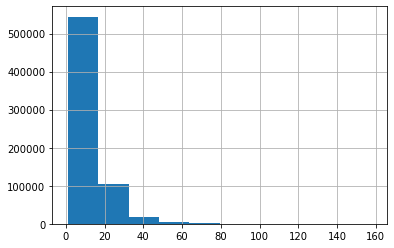

In [27]:
df["term_in_months"].hist()